# Librerías

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga los datos

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
! cp /content/drive/MyDrive/visualizacion_esp/ticket_trend.json .

In [32]:
!ls

drive  sample_data  ticket_trend.json


In [33]:
ticket_trend=pd.read_json('ticket_trend.json')

# Entendiendo estructura de  los datos

In [34]:
ticket_trend.head()

,Ticket_Type,Number_of_Tickets,Date
0,Received,160,2019-01-01
1,Received,184,2019-02-01
2,Received,241,2019-03-01
3,Received,149,2019-04-01
4,Received,180,2019-05-01


In [35]:
ticket_trend.shape


(24, 3)

In [36]:
ticket_trend['Ticket_Type'].unique()

array(['Received', 'Processed'], dtype=object)

# Lista de errores gráfico original



*   Se combinan gráficos de barras y valores
*   la separación en el eje X no es uniforme 
*   Para las tendencias los gráficos de barra no son adecuados
*   el gráfico no es minimalista, las lineas de fondo lo hacen más cargado y puede reducir la rápida interpretabilidad 




# Propuesta de gráfico

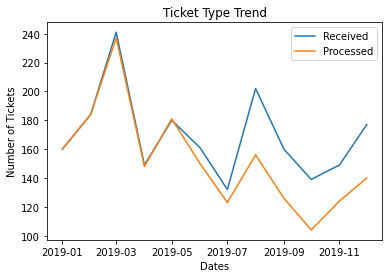

In [42]:
sns.lineplot(x='Date',y='Number_of_Tickets',data=ticket_trend,hue='Ticket_Type')
plt.title('Ticket Type Trend')
plt.ylabel('Number of Tickets')
plt.xlabel('Dates')
plt.legend()
plt.show()

In [38]:
ticket_trend_pivot=ticket_trend.pivot(index='Date',columns='Ticket_Type',values='Number_of_Tickets')
ticket_trend_pivot.reset_index()

Ticket_Type,Date,Processed,Received
0,2019-01-01,160,160
1,2019-02-01,184,184
2,2019-03-01,237,241
3,2019-04-01,148,149
4,2019-05-01,181,180
5,2019-06-01,150,161
6,2019-07-01,123,132
7,2019-08-01,156,202
8,2019-09-01,126,160
9,2019-10-01,104,139


In [39]:
ticket_trend_pivot['percentage_processed']=(ticket_trend_pivot['Processed']/ticket_trend_pivot['Received'])*100

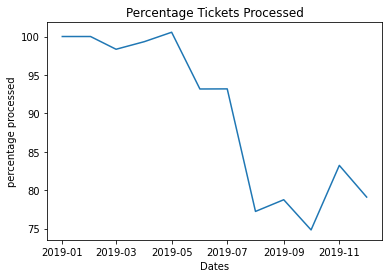

In [43]:
sns.lineplot(x='Date', y='percentage_processed',data=ticket_trend_pivot)
plt.title('Percentage Tickets Processed')
plt.ylabel('percentage processed')
plt.xlabel('Dates')
plt.show()